#Importing required libraries as well as reading the csv file to the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project 6/Electric_Production.csv')

In [3]:
data

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [5]:
data = data.rename(columns={'IPG2211A2N': 'Consumption'})

#To retrieve the date when the electricity is consumed the highest and the lowest respectively

In [11]:
# Assuming 'data' has a 'Year' and 'Consumption' column
year_with_highest_consumption = data.loc[data['Consumption'].idxmax(), 'DATE']
print(year_with_highest_consumption)

1/1/2018


In [9]:
year_with_lowest_consumption = data.loc[data['Consumption'].idxmin(), 'DATE'].dt.year
print(year_with_lowest_consumption)

5/1/1985


In [13]:
data2=data.copy()

In [15]:
# Convert 'DATE' column to datetime if it's not already
data2['DATE'] = pd.to_datetime(data2['DATE'])

# Now you can extract the year
data2['Year'] = data2['DATE'].dt.year

In [16]:
data2

,DATE,Consumption,Year
0,1985-01-01,72.5052,1985
1,1985-02-01,70.6720,1985
2,1985-03-01,62.4502,1985
3,1985-04-01,57.4714,1985
4,1985-05-01,55.3151,1985
...,...,...,...
392,2017-09-01,98.6154,2017
393,2017-10-01,93.6137,2017
394,2017-11-01,97.3359,2017
395,2017-12-01,114.7212,2017


#To retrieve the year only when the electricity is consumed the most as well as the least respectively

In [30]:
year_with_highest_total_consumption = data2.groupby('Year')['Consumption'].sum().idxmax()
print(year_with_highest_total_consumption)

2014


In [31]:
year_with_lowest_consumption = data2.groupby('Year')['Consumption'].sum().idxmin()
print(year_with_lowest_consumption)

2018


Graph of the highest and lowest electricity consumption(datewise)

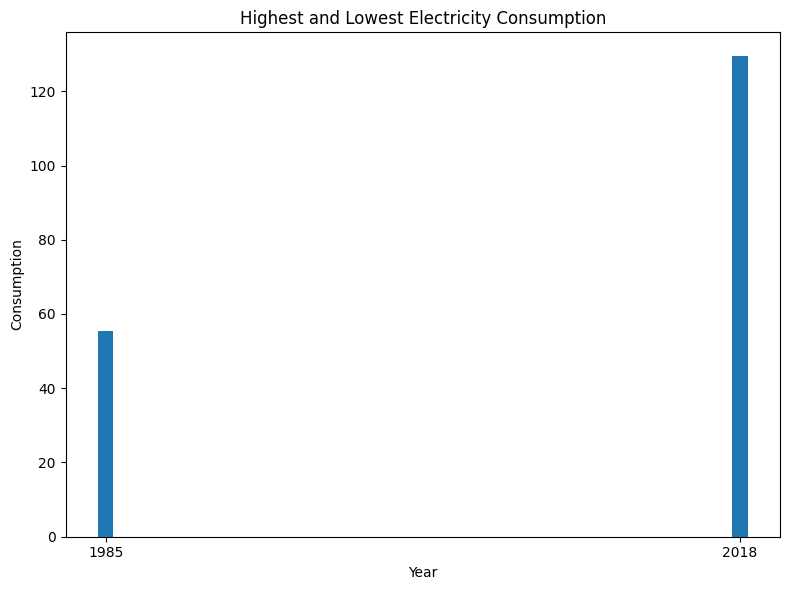

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 'DATE' and 'Consumption' columns

# Find the year with the highest consumption
year_highest = data2.loc[data2['Consumption'].idxmax(), 'DATE'].year
highest_consumption = data2['Consumption'].max()

# Find the year with the lowest consumption
year_lowest = data2.loc[data2['Consumption'].idxmin(), 'DATE'].year
lowest_consumption = data2['Consumption'].min()

# Create a bar graph
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar([year_highest, year_lowest], [highest_consumption, lowest_consumption])
plt.title('Highest and Lowest Electricity Consumption(By Date)')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.xticks([year_highest, year_lowest])  # Set x-axis ticks to the specific years
plt.tight_layout()
plt.show()

Graph of the highest and lowest electricity consumption(yearly)

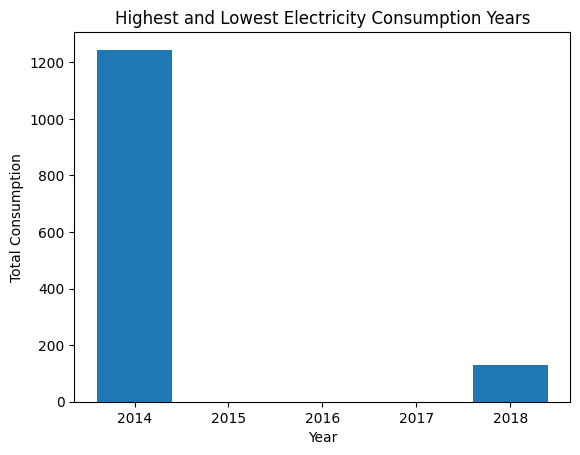

In [32]:
import matplotlib.pyplot as plt

# Assuming 'data' has a 'Year' and 'Consumption' column
yearly_consumption = data2.groupby('Year')['Consumption'].sum()
highest_consumption_year = yearly_consumption.idxmax()
lowest_consumption_year = yearly_consumption.idxmin()

plt.bar([highest_consumption_year, lowest_consumption_year], [yearly_consumption[highest_consumption_year], yearly_consumption[lowest_consumption_year]])
plt.xlabel('Year')
plt.ylabel('Total Consumption')
plt.title('Highest and Lowest Electricity Consumption Years(Yearly)')
plt.show()

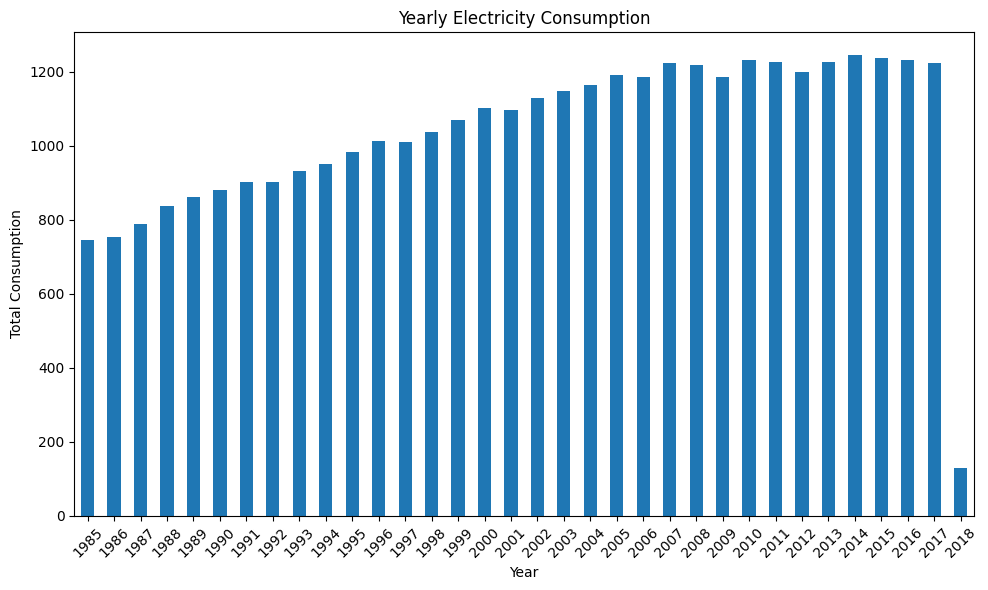

In [19]:
yearly_consumption = data2.groupby('Year')['Consumption'].sum()

# Create a bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
yearly_consumption.plot(kind='bar')
plt.title('Yearly Electricity Consumption')
plt.xlabel('Year')
plt.ylabel('Total Consumption')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#Power Production Variation each year

In [23]:
import pandas as pd
# Group the data by year and calculate the standard deviation of consumption
yearly_variation = data2.groupby('Year')['Consumption'].std()

print(yearly_variation)

Year
1985     5.746613
1986     5.317393
1987     4.858488
1988     5.990256
1989     6.053921
1990     5.513634
1991     5.568066
1992     5.884267
1993     6.583194
1994     7.375030
1995     6.961303
1996     7.290402
1997     7.233513
1998     6.289893
1999     7.521016
2000     7.191700
2001     8.249804
2002     6.625056
2003     8.741695
2004     8.527115
2005     9.003874
2006     7.957369
2007     8.406684
2008     8.607019
2009     9.580921
2010    11.264766
2011    10.349859
2012     8.709470
2013     8.627149
2014     9.794913
2015    10.265377
2016    10.566353
2017     8.911131
2018          NaN
Name: Consumption, dtype: float64


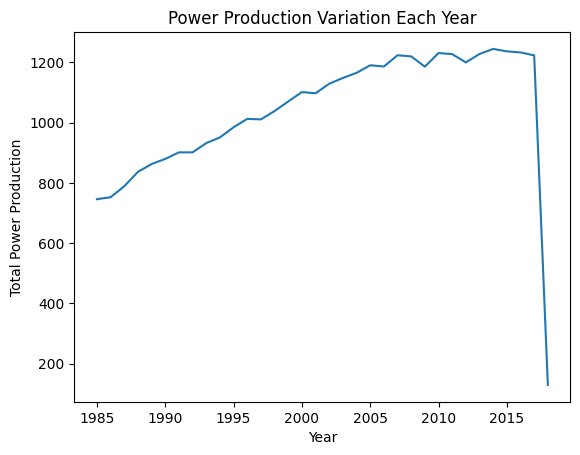

In [25]:
import matplotlib.pyplot as plt

# Assuming 'data' has a 'Year' and 'Consumption' column
data2.groupby('Year')['Consumption'].sum().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Total Power Production')
plt.title('Power Production Variation Each Year')
plt.show()

#Average Consumption Rate of electricity each year

In [26]:
# Assuming 'data' has a 'Year' and 'Consumption' column
average_consumption_by_year = data2.groupby('Year')['Consumption'].mean()
print(average_consumption_by_year)

Year
1985     62.165667
1986     62.709892
1987     65.740275
1988     69.716358
1989     71.895167
1990     73.313433
1991     75.111850
1992     75.120908
1993     77.678992
1994     79.255058
1995     82.060867
1996     84.382417
1997     84.236192
1998     86.544075
1999     89.190892
2000     91.790125
2001     91.460792
2002     94.107075
2003     95.700108
2004     97.119225
2005     99.208242
2006     98.873225
2007    101.984167
2008    101.663992
2009     98.829783
2010    102.596883
2011    102.290475
2012     99.999992
2013    102.337350
2014    103.732783
2015    103.052908
2016    102.764375
2017    101.944842
2018    129.404800
Name: Consumption, dtype: float64


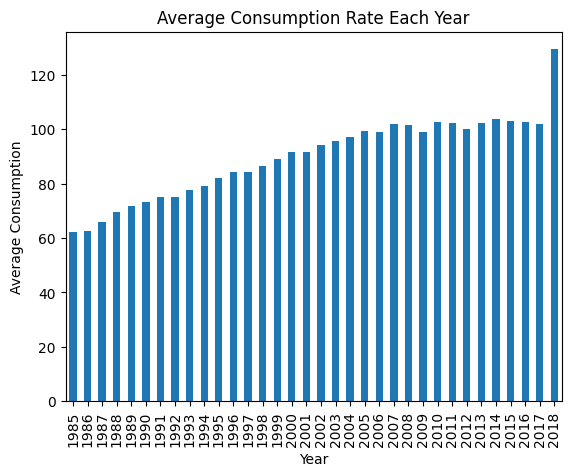

In [28]:
import matplotlib.pyplot as plt

# Assuming 'data' has a 'Year' and 'Consumption' column
average_consumption_by_year = data2.groupby('Year')['Consumption'].mean()
average_consumption_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Average Consumption')
plt.title('Average Consumption Rate Each Year')
plt.show()